<a href="https://colab.research.google.com/github/Chakita/Face_Mask_detector/blob/master/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip Final_dataset.zip 

Archive:  Final_dataset.zip
   creating: Final_dataset/mask/
  inflating: Final_dataset/mask/118_wm.jpg  
  inflating: Final_dataset/mask/122_wm.jpg  
  inflating: Final_dataset/mask/130_wm.jpg  
  inflating: Final_dataset/mask/131_wm.jpg  
  inflating: Final_dataset/mask/157_wm.jpg  
  inflating: Final_dataset/mask/158_wm.jpg  
  inflating: Final_dataset/mask/159_wm.jpg  
  inflating: Final_dataset/mask/206_wm.jpg  
  inflating: Final_dataset/mask/21_wm.jpg  
  inflating: Final_dataset/mask/28_wm.jpg  
  inflating: Final_dataset/mask/33_wm.jpg  
  inflating: Final_dataset/mask/35_wm.jpg  
  inflating: Final_dataset/mask/4_wm.jpg  
  inflating: Final_dataset/mask/75_wm.jpg  
  inflating: Final_dataset/mask/90_wm.jpg  
  inflating: Final_dataset/mask/91_wm.jpg  
  inflating: Final_dataset/mask/98_wm.jpg  
  inflating: Final_dataset/mask/99_wm.jpg  
  inflating: Final_dataset/mask/9bf564-20200722-gov-walz-mask-mandate-presser0001.jpg  
  inflating: Final_dataset/mask/download (1).jpg  
 

['mask', 'no_mask']


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


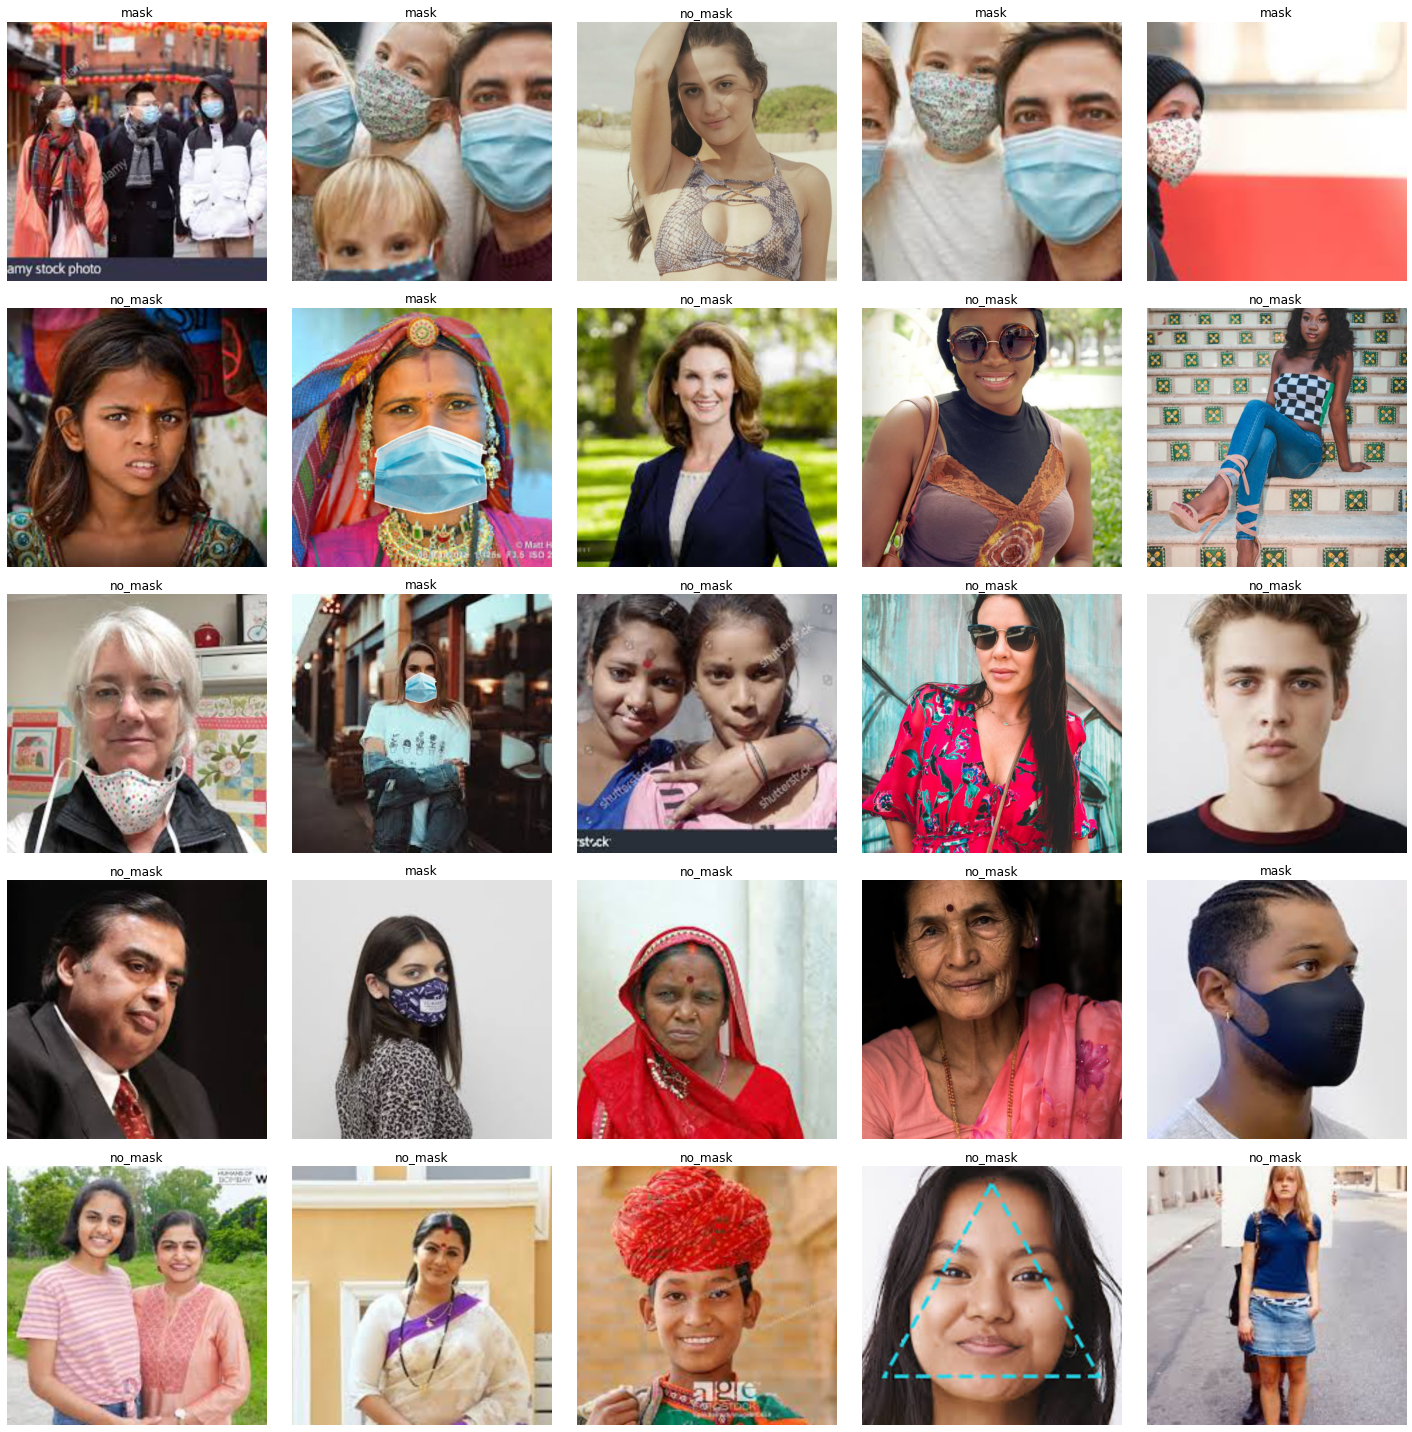

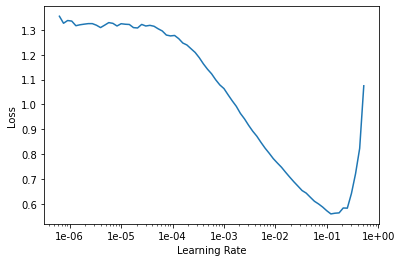

In [2]:
from fastai.vision import *

data=ImageDataBunch.from_folder("Final_dataset",valid_pct=0.2,size=500)
print(data.classes)
data.show_batch()
learn=cnn_learner(data,models.resnet34,metrics=error_rate)
learn.lr_find()
learn.recorder.plot()
#learn.show_results()

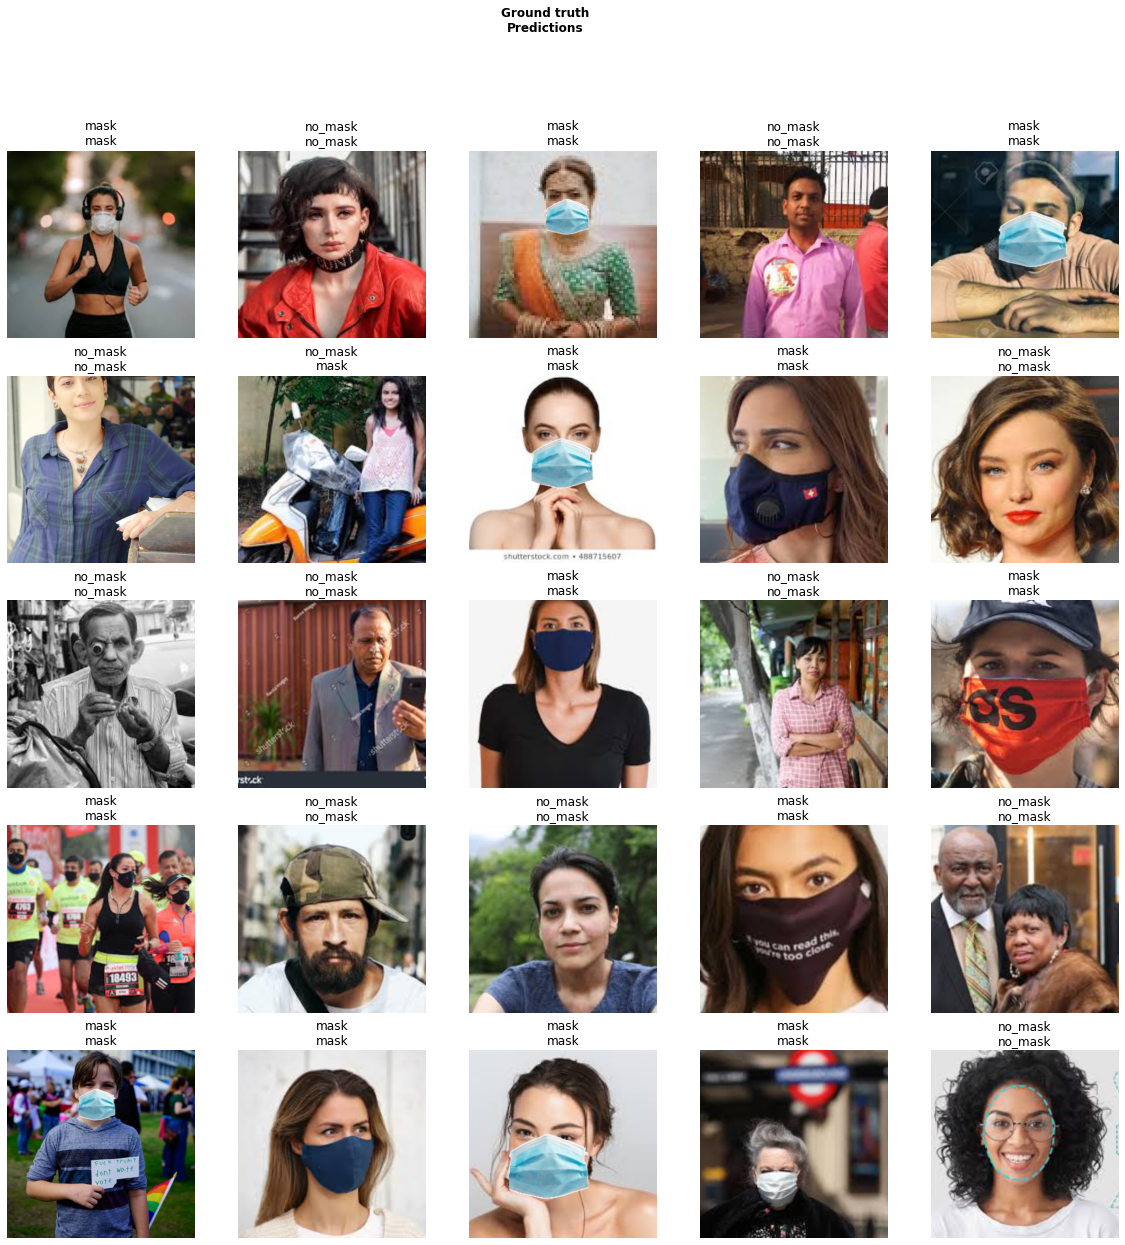

In [4]:
learn.fit_one_cycle(4,0.01)
learn.show_results()

mask


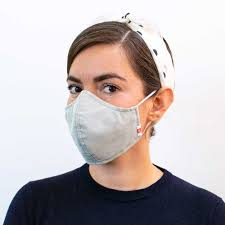

no_mask


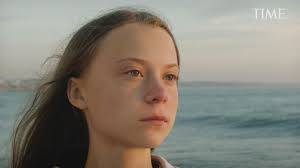

In [34]:
learn.export("export.pkl")
learn=load_learner("/content/Final_dataset")
from fastai.vision.image import pil2tensor,Image
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread("test2.jpg")
preds=learn.predict(Image(pil2tensor(img,np.float32).div_(255)))[0]
print(preds)
cv2_imshow(img)
img2=cv2.imread("test4.jpg")
preds=learn.predict(Image(pil2tensor(img2,np.float32).div_(255)))[0]
print(preds)
cv2_imshow(img2)